In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Lectura de datos para cargue en variable

Datos = pd.read_csv("Regresion_log_Heart/heart_cleveland_upload.csv")

In [3]:
# Lectura de datos para análisis exploratorio
Datos.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
# Descripción de los datos

Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Datos faltantes y atípicos (Niveles de colesterol)')

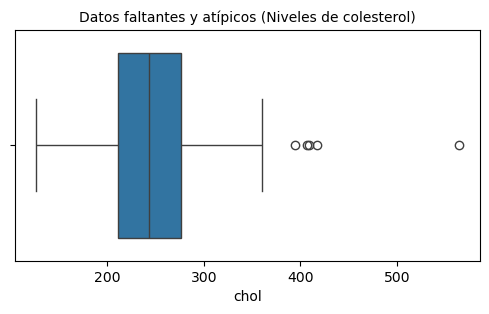

In [5]:
# Identificación datos faltante y atípicos a partír de variable de niveles de colesterol
# según niveles entre 200 a 239 se consideran elevados.

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chol'])
plt.title('Datos faltantes y atípicos (Niveles de colesterol)', fontsize=10)

Text(0.5, 1.0, 'Datos faltantes y atípicos (Edad)')

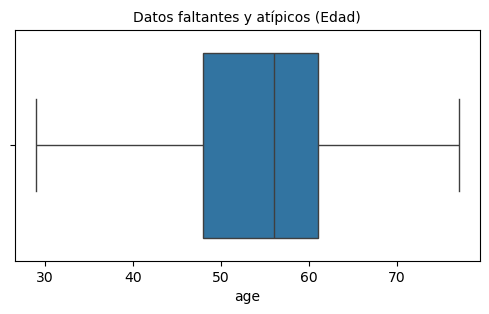

In [6]:
# Identificación datos faltante y atípicos a partír de variable de edad.

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['age'])
plt.title('Datos faltantes y atípicos (Edad)', fontsize=10)

Text(0.5, 1.0, 'Datos faltantes y atípicos (Frecuencia cardiaca)')

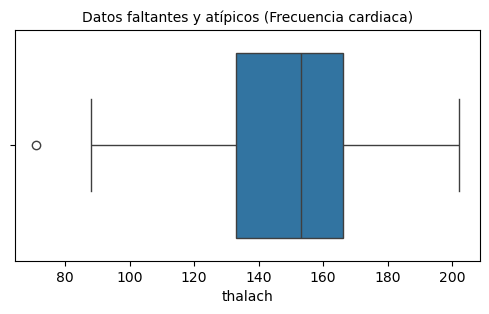

In [7]:
# Identificación datos faltante y atípicos a partír de variable de Frecuencia cardiaca.
 
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thalach'])
plt.title('Datos faltantes y atípicos (Frecuencia cardiaca)', fontsize=10)

Text(0.5, 1.0, 'Datos faltantes y atípicos (Tipo de dolor)')

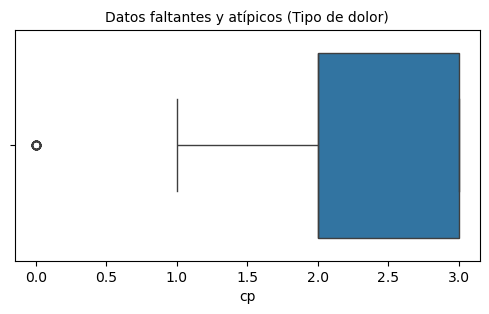

In [8]:
# Identificación datos faltante y atípicos a partír de variable de tipo de dolor de pecho
# Esta categorizado por 4 tipos (0. Angina típica, 1. Angina atípica, 2. Dolor no anginal, 3. Asintomático)

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['cp'])
plt.title('Datos faltantes y atípicos (Tipo de dolor)', fontsize=10)

Text(0.5, 1.0, 'Datos faltantes y atípicos (Presión arterial en reposo)')

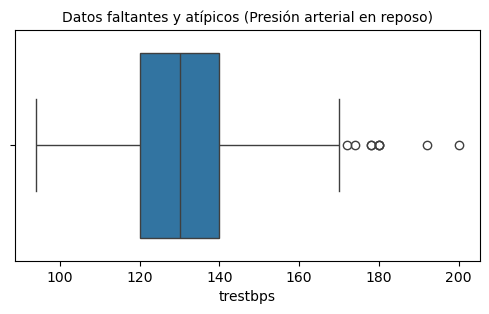

In [9]:
# Identificación datos faltante y atípicos a partír de variable de Presión arterial en reposo
# Presión arterial óptima: menor a 120/80 mm Hg
# Presión arterial normal: entre 120-129/80-84 mm Hg
# Presión arterial normal alta: entre 130-139/85-89 mm Hg
# Hipertensión arterial: mayor a 140/90 mm Hg

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Datos faltantes y atípicos (Presión arterial en reposo)', fontsize=10)

Text(0.5, 1.0, 'Datos faltantes y atípicos (Depresión del segmento ST)')

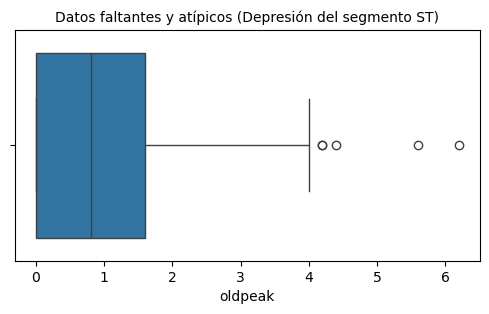

In [10]:
# Identificación datos faltante y atípicos a partír de variable de Depresión del segmento ST
# Es el hallazgo característico asociado con la isquemia inducida por el ejercicio y la demanda 
# en pacientes con obstrucción coronaria significativa pero sin limitación de flujo en reposo.
# Puede indicar isquemia cardíaca en presencia de síntomas cardíacos activos.
# La isquemia miocárdica ocurre cuando se reduce el flujo sanguíneo por una o más de las arterias coronarias.
# Se clasifica:
# < 1 mm	Puede ser inespecífica, especialmente si es ascendente.
# 1-2 mm	Posible isquemia inducida por ejercicio.
# 2-3 mm	Isquemia moderada a severa.
# ≥ 3 mm	Isquemia grave, alto riesgo de eventos coronarios.
# ≥ 4 mm	Isquemia miocárdica crítica, muy preocupante.


plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Datos faltantes y atípicos (Depresión del segmento ST)', fontsize=10)

In [11]:
# Procesamiento de datos con limpieza, tratamiento de valores faltantes y transformación a necesidad.

# 2. Revisión de datos faltantes, se esta indicando en esta sección si es sistema encuentra valores cero en las variables seleccionadas ###############

print ("Cantidad de valores con cero en niveles de colesterol",Datos['chol'].isin([0]).sum())
print ("Cantidad de valores con cero en edad",Datos['age'].isin([0]).sum())
print ("Cantidad de valores con cero en niveles de frecuencia cardiaca",Datos['thalach'].isin([0]).sum())
print ("Cantidad de valores con cero en tipo de dolor",Datos['cp'].isin([0]).sum())
print ("Cantidad de valores con cero en niveles de presión arterial",Datos['trestbps'].isin([0]).sum())

Cantidad de valores con cero en niveles de colesterol 0
Cantidad de valores con cero en edad 0
Cantidad de valores con cero en niveles de frecuencia cardiaca 0
Cantidad de valores con cero en tipo de dolor 23
Cantidad de valores con cero en niveles de presión arterial 0


In [12]:
# Reemplazo de todos los ceros con el valor medio (Promedio) de la columna.
# Aplicación de inputación en datos.

Datos['chol']=Datos['chol'].replace(0,Datos['chol'].mean())
Datos['age']=Datos['age'].replace(0,Datos['age'].mean())
Datos['thalach']=Datos['thalach'].replace(0,Datos['thalach'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['trestbps']=Datos['trestbps'].replace(0,Datos['trestbps'].mean())

In [13]:
# Revisión provisional datos faltantes

print ("Cantidad de valores con cero en niveles de colesterol",Datos['chol'].isin([0]).sum())
print ("Cantidad de valores con cero en edad",Datos['age'].isin([0]).sum())
print ("Cantidad de valores con cero en niveles de frecuencia cardiaca",Datos['thalach'].isin([0]).sum())
print ("Cantidad de valores con cero en tipo de dolor",Datos['cp'].isin([0]).sum())
print ("Cantidad de valores con cero en niveles de presión arterial",Datos['trestbps'].isin([0]).sum())

Cantidad de valores con cero en niveles de colesterol 0
Cantidad de valores con cero en edad 0
Cantidad de valores con cero en niveles de frecuencia cardiaca 0
Cantidad de valores con cero en tipo de dolor 0
Cantidad de valores con cero en niveles de presión arterial 0


Text(0.5, 1.0, 'Datos faltantes y atípicos (Niveles de colesterol)')

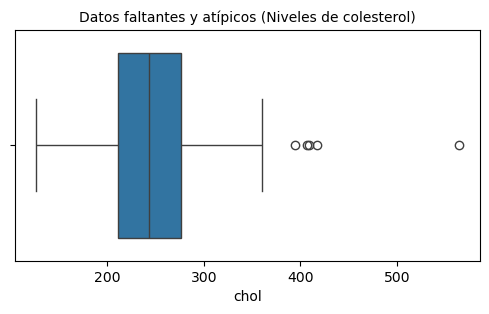

In [14]:
# Identificación datos faltante y atípicos a partír de variable de niveles de colesterol
# según niveles entre 200 a 239 se consideran elevados.

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chol'])
plt.title('Datos faltantes y atípicos (Niveles de colesterol)', fontsize=10)

In [15]:
#Conteo de datos atípicos colesterol

nivel_minimo=200
nivel_maximo=500
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos en colesterol es: {}".format(Total_Atipicos))

El total de datos atípicos en colesterol es: 49


El total de los datos atípicos de colesterol es: 0


Text(0.5, 1.0, 'Datos faltantes y atípicos (Frecuencia cardiaca)')

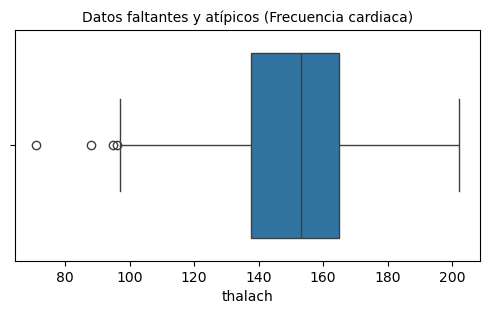

In [18]:
# Identificación datos faltante y atípicos a partír de variable de Frecuencia cardiaca máxima.

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thalach'])
plt.title('Datos faltantes y atípicos (Frecuencia cardiaca)', fontsize=10)

In [19]:
#Conteo de datos atípicos Frecuencia cardiaca, se estiman lo siguientes rangos según las edades estimadas en el dataset:
#40 años → 180 lpm
#50 años → 170 lpm
#60 años → 160 lpm
#70 años → 150 lpm


nivel_minimo=140
nivel_maximo=180
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos en Frecuencia cardiaca es: {}".format(Total_Atipicos))

El total de datos atípicos en Frecuencia cardiaca es: 80


Text(0.5, 1.0, 'Identificación datos atípicos')

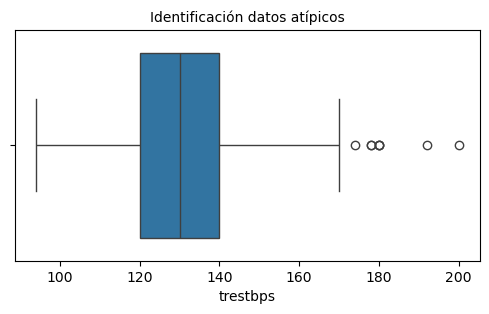

In [20]:
#Identificación de valores atípicos
# Presión arterial

# Presión arterial óptima: menor a 120/80 mm Hg
# Presión arterial normal: entre 120-129/80-84 mm Hg
# Presión arterial normal alta: entre 130-139/85-89 mm Hg
# Hipertensión arterial: mayor a 140/90 mm Hg

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación datos atípicos', fontsize=10)

In [21]:
#Conteo de datos atípicos presión arterial

nivel_minimo=120
nivel_maximo=200
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos en presión arterial es: {}".format(Total_Atipicos))

El total de datos atípicos en presión arterial es: 46


Text(0.5, 1.0, 'Datos faltantes y atípicos (Depresión del segmento ST)')

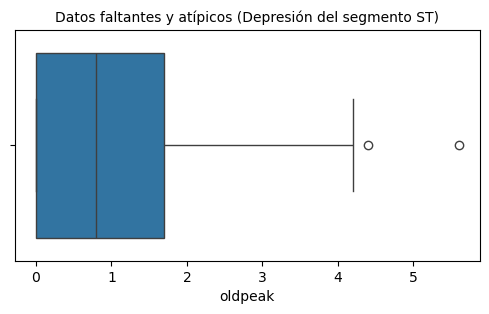

In [22]:
# Identificación datos faltante y atípicos a partír de variable de Depresión del segmento ST
# Es el hallazgo característico asociado con la isquemia inducida por el ejercicio y la demanda 
# en pacientes con obstrucción coronaria significativa pero sin limitación de flujo en reposo.
# Puede indicar isquemia cardíaca en presencia de síntomas cardíacos activos.
# La isquemia miocárdica ocurre cuando se reduce el flujo sanguíneo por una o más de las arterias coronarias.
# Se clasifica:
# < 1 mm	Puede ser inespecífica, especialmente si es ascendente.
# 1-2 mm	Posible isquemia inducida por ejercicio.
# 2-3 mm	Isquemia moderada a severa.
# ≥ 3 mm	Isquemia grave, alto riesgo de eventos coronarios.
# ≥ 4 mm	Isquemia miocárdica crítica, muy preocupante.


plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Datos faltantes y atípicos (Depresión del segmento ST)', fontsize=10)

In [23]:
# Conteo de datos atípicos Depresión del segmento ST

nivel_minimo=0
nivel_maximo=6
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos en Frecuencia cardiaca es: {}".format(Total_Atipicos))

El total de datos atípicos en Frecuencia cardiaca es: 247


In [ ]:
# Filtración datos atípicos

Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [ ]:
# Filtra datos atípicos

Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de los datos atípicos de colesterol es: {}".format(Total_Atipicos)) 

In [24]:
Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]

In [25]:
# Validación remoción datos atípicos

Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de los datos atípicos en frecuencia cardiaca es: {}".format(Total_Atipicos)) 

El total de los datos atípicos en frecuencia cardiaca es: 0


In [26]:
Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [27]:
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de los datos atípicos en presión arterial es: {}".format(Total_Atipicos)) 

El total de los datos atípicos en presión arterial es: 0


In [28]:
Datos=Datos[(Datos['oldpeak']<nivel_maximo)&(Datos['oldpeak']>nivel_minimo)]

In [29]:
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de los datos atípicos en segmento ST es: {}".format(Total_Atipicos)) 


El total de los datos atípicos en segmento ST es: 0


In [30]:
#Revisión tipos de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      int64  
 2   cp         0 non-null      float64
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      int64  
 6   restecg    0 non-null      int64  
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      int64  
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      int64  
 11  ca         0 non-null      int64  
 12  thal       0 non-null      int64  
 13  condition  0 non-null      int64  
dtypes: float64(2), int64(12)
memory usage: 0.0 bytes


In [31]:
# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. ##########################

# Características de interes:
# La presencia de enfermedad cardíaca. (1. la tiene // 0. No la tiene)
# Predecir si una persona puede tener una enfermedad caridaca

In [32]:
# Total de personas con enfermedad cardiaca

Datos['condition'].value_counts()

Series([], Name: count, dtype: int64)